# 7 Herarchical Clustering of A.thaliana (integrated matrix)
#### Dataset1+Dataset2 = Arabidopsis Control + Arabidopsis Infected)

Cynthia Soto <br>
Fecha: 13 de Octubre 2020 <br>
Datatype representation: normalized values in log2 scale (genome name reference) <br>
Data quantify with HTSeq (alignments done with STAR SA)  <br>

At this point: <br>
<ol>
<li>Datasets are normalized and integrated in one file (transformed into log2 scale)</li>
<li>Distributions are known</li>
<li>A soft removing of gene IDs with zeros across all samples was done (12% of attributes)</li>
<li>An **agglomerative clustering** approach of the **hierarchical clustering** tecnique is taken</li>
</ol> 

**Workflow:** <br>
1) Format the array (18 xtromes) <br>
2) Plot a dendogram to set a threshold cut .  <br> 
3) Cut the tree.  <br>
4) Run the agglomerative clusttering.  <br>
5) Visualize the results.  <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis


In [3]:
# Import Data (example with 2 cvs files)
df1=pd.read_csv("all_log2_dropped20ceros_SRR.csv", sep='\t')  #,nrows=100 , usecols=[1,3]
## remove unnamed cols
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)
df1.drop('zero-counter', axis='columns', inplace=True)

## Remove samples SRR6283147 and SRR6283148 (they did not pass alignment quality)
df1.drop('SRR6283147', axis='columns', inplace=True)
df1.drop('SRR6283148', axis='columns', inplace=True)
print(df1.shape)
print(df1.columns)
df1.head(5)

(24326, 19)
Index(['Genes', 'SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145',
       'SRR3383641', 'SRR3383783', 'SRR3383822', 'SRR6283144', 'SRR364399',
       'SRR3383696', 'SRR3383780', 'SRR10586397pe', 'SRR10586399pe',
       'SRR3383779', 'SRR3383697', 'SRR364390', 'SRR364389', 'SRR364398'],
      dtype='object')


,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,SRR364399,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,6.930737,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,6.727920,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,3.584963,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,9.262095,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,7.954196,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808


In [4]:
lst_genes=list(df1.Genes)
# lst_genes

In [5]:
data=df1.set_index('Genes')
data

,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,SRR364399,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
Genes,,,,,,,,,,,,,,,,,,
AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795,6.930737,6.539159,7.044394,8.577429,8.607330,6.044394,6.988685,6.965784,6.977280,6.942515
AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552,6.727920,7.149747,7.400879,7.228819,7.139551,6.918863,7.375039,7.467606,7.330917,6.954196
AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440,3.584963,2.807355,4.523562,5.727920,5.906891,4.321928,4.392317,3.169925,3.169925,3.459432
AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667,9.262095,10.047124,10.251482,10.167418,10.200899,9.812177,10.382624,9.743151,9.842350,9.303781
AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783,7.954196,10.284246,9.768184,9.967226,9.744834,9.481799,10.651949,8.689998,8.774787,8.016808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATMG01350,1.000000,1.584963,0.000000,3.000000,1.584963,1.000000,0.000000,3.169925,4.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.584963,1.584963,2.807355,3.459432
ATMG01360,4.392317,4.807355,5.700440,6.554589,6.247928,4.807355,4.523562,6.392317,8.778077,5.247928,5.087463,4.321928,4.000000,4.643856,5.044394,7.238405,7.507795,8.661778
ATMG01370,4.643856,5.129283,5.321928,5.832890,6.228819,4.169925,4.321928,4.321928,7.714246,4.857981,5.044394,4.954196,4.754888,4.087463,4.954196,7.285402,7.118941,7.700440


In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144,SRR364399,SRR3383696,SRR3383780,SRR10586397pe,SRR10586399pe,SRR3383779,SRR3383697,SRR364390,SRR364389,SRR364398
0,0.219604,0.237503,0.230441,0.210960,0.255586,0.197198,0.204204,0.252736,0.233311,0.220129,0.237137,0.288743,0.289750,0.203473,0.235261,0.234490,0.234877,0.233707
1,0.220984,0.234751,0.255123,0.243553,0.263361,0.224721,0.213506,0.240227,0.219669,0.233442,0.241642,0.236024,0.233109,0.225904,0.240798,0.243820,0.239357,0.227057
2,0.211440,0.184482,0.287110,0.243926,0.251214,0.211440,0.226996,0.261037,0.199090,0.155905,0.251214,0.318098,0.328037,0.240017,0.243926,0.176041,0.176041,0.192118
3,0.230651,0.230358,0.258528,0.260760,0.257389,0.239092,0.214838,0.260113,0.213511,0.231608,0.236318,0.234381,0.235152,0.226192,0.239342,0.224600,0.226887,0.214472
4,0.234758,0.227207,0.274481,0.255216,0.261817,0.247235,0.209091,0.260922,0.191853,0.248054,0.235606,0.240407,0.235043,0.228699,0.256922,0.209601,0.211646,0.193364


Here, a dendrogram is created to observe the relationships (clades)

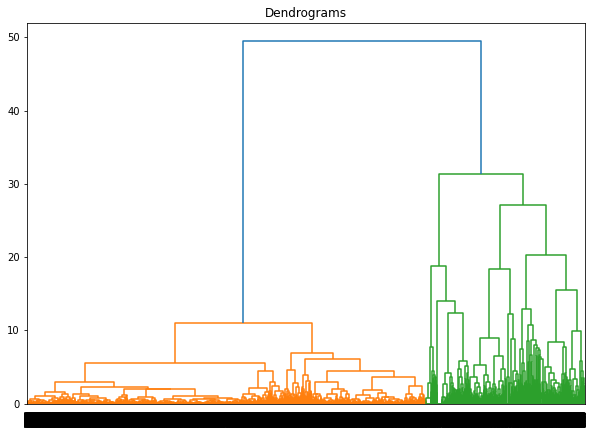

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

El eje de las abcisas contiene las observaciones de las muestras (las cuantificaciones de expresión) y el eje de las ordenasas representa la distancia entre estas observaciones. La línea vertical con distancia máxima es la línea azul y por lo tanto podemos decidir un umbral de corte. Digamos 40 y cortar el dendrograma.

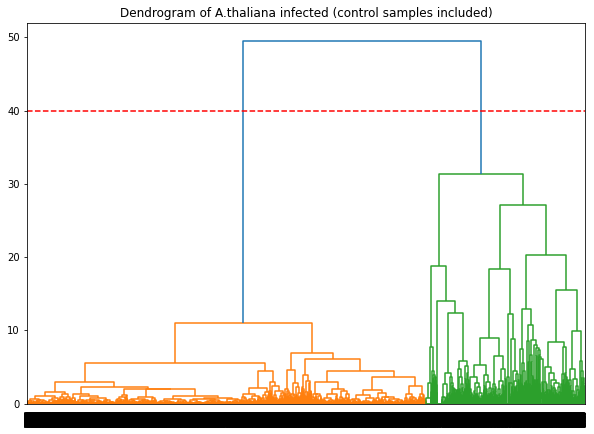

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram of A.thaliana infected (control samples included)")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=40, color='r', linestyle='--')

Esto, nos generara dos grupos, ya que esta línea corta el dendrograma en dos puntos. Enseguida, aplicare la agrupación en clústeres jerárquica a partir de 2 clústeres.

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, ..., 1, 0, 0])

Ahora, se puede ver los valores de 0 y 1 en la salida ya que se definio 2 grupos. <br>
0 representa los puntos que pertenecen al primer grupo y <br>
1 representa puntos en el segundo grupo. <br>
Ahora visualicemos los dos grupos.

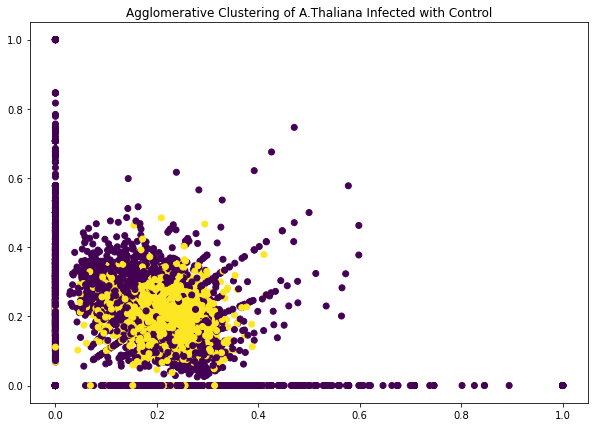

In [10]:
plt.figure(figsize=(10, 7))  
plt.title("Agglomerative Clustering of A.Thaliana Infected with Control")  
plt.scatter(data_scaled['SRR3383640'], data_scaled['SRR364390'], c=cluster.labels_) 

Como no se obtiene resultados. Se realiazara el clustering solo para el dataset infectado. 

### Ahora, veamos un ejemplo con 8 muestras y 100 genes

In [25]:
df1=pd.read_csv("all_log2_dropped20ceros_SRR.csv",nrows=100, usecols=[0,1,2,3,4,5,6,7,8,9], sep='\t')  #,nrows=100 , usecols=[1,3]
## remove unnamed cols
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)

## Remove samples SRR6283147 and SRR6283148 (they did not pass alignment quality)
#df1.drop('SRR6283147', axis='columns', inplace=True)
print(df1.shape)
print(df1.columns)
df1.head(5)

(100, 9)
Index(['Genes', 'SRR3383640', 'SRR3383821', 'SRR3383782', 'SRR6283145',
       'SRR3383641', 'SRR3383783', 'SRR3383822', 'SRR6283144'],
      dtype='object')


,Genes,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
0,AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795
1,AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552
2,AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440
3,AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667
4,AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783


In [26]:
data=df1.set_index('Genes')
data

,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
Genes,,,,,,,,
AT1G01010,6.523562,7.055282,6.845490,6.266787,7.592457,5.857981,6.066089,7.507795
AT1G01020,6.768184,7.189825,7.813781,7.459432,8.066089,6.882643,6.539159,7.357552
AT1G01030,3.807355,3.321928,5.169925,4.392317,4.523562,3.807355,4.087463,4.700440
AT1G01040,10.005625,9.992938,11.214926,11.311748,11.165535,10.371777,9.319672,11.283667
AT1G01050,9.733015,9.419960,11.379920,10.581201,10.854868,10.250298,8.668885,10.817783
...,...,...,...,...,...,...,...,...
AT1G01950,7.826548,8.022368,9.276124,8.672425,9.041659,8.562242,7.409391,8.957102
AT1G01960,10.314017,10.669771,11.273796,11.269711,11.269711,10.192293,10.015415,11.400346
AT1G01970,8.861087,7.994353,10.280771,8.758223,9.893302,9.243174,7.515700,8.266787


In [27]:
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,SRR3383640,SRR3383821,SRR3383782,SRR6283145,SRR3383641,SRR3383783,SRR3383822,SRR6283144
0,0.342119,0.370004,0.359002,0.328653,0.398176,0.307213,0.318127,0.393736
1,0.328876,0.349364,0.379683,0.362464,0.391943,0.334437,0.317747,0.357514
2,0.315844,0.275575,0.428878,0.364371,0.375258,0.315844,0.339081,0.389931
3,0.333498,0.333075,0.373806,0.377033,0.372159,0.345702,0.310635,0.376097
4,0.335820,0.325019,0.392644,0.365086,0.374528,0.353668,0.299105,0.373248


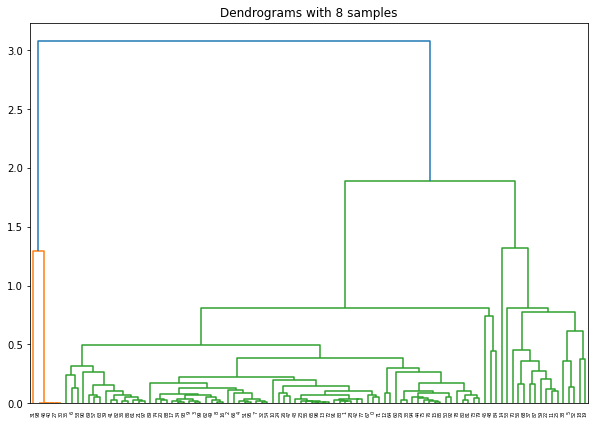

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with 8 samples")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

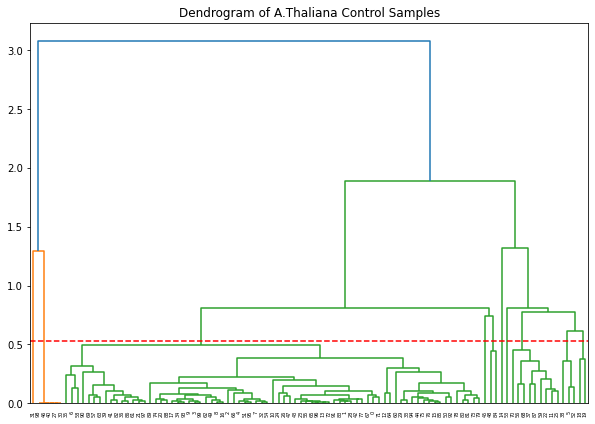

In [30]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram of A.Thaliana Control Samples")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.53, color='r', linestyle='--')

In [31]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 7, 0, 0, 0, 2, 2, 0, 0,
       1, 0, 0, 1, 0, 5, 0, 0, 5, 9, 0, 0, 0, 0, 0, 1, 4, 0, 5, 0, 0, 0,
       0, 8, 5, 0, 3, 0, 0, 0, 4, 6, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0])

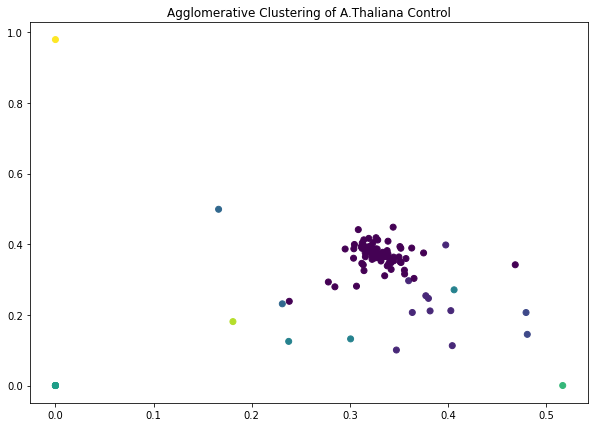

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Agglomerative Clustering of A.Thaliana Control")  
plt.scatter(data_scaled['SRR3383640'], data_scaled['SRR6283145'], c=cluster.labels_) 

Resource: <br>
https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/ <br>
https://scikit-learn.org/stable/modules/clustering.html 